# <center> **DMRG Tests**

In [ ]:
from variational_algorithms.tensor_networks.tensor_networks import MPO
from variational_algorithms.tensor_networks.tn_algorithms import DMRG

from variational_algorithms.use_cases.maxcut.instances import MaxCut_Instance
from variational_algorithms.use_cases.maxcut.cost_function import MaxCut_CostFunction

import matplotlib.pyplot as plt

## **DRMG for Max Cut**

In [93]:
n_nodes = 100

instance_max_cut = MaxCut_Instance(n_nodes)
instance_max_cut.random_uniform_weights()


cost_function_max_cut = MaxCut_CostFunction(instance_max_cut)

n_qubits = cost_function_max_cut.num_bin_vars

In [94]:
chi = 4

mpo_max_cut = MPO(n_sites=n_nodes, phys_d=2, chi=chi, open_bounds=False)

mpo_max_cut.from_ham(cost_function_max_cut.total_hamiltonian)

dmrg_max_cut = DMRG(mpo= mpo_max_cut, chi=chi, sweeps=10, lanczos_maxit=2, lanczos_krydim=4, metrics = True)

left_mps_4, right_mps_4, sweight_4, energy_4, coherence_4, effective_dimension_4 = dmrg_max_cut.run()

In [95]:
chi = 8

mpo_max_cut = MPO(n_sites=n_nodes, phys_d=2, chi=chi, open_bounds=False)

mpo_max_cut.from_ham(cost_function_max_cut.total_hamiltonian)

dmrg_max_cut = DMRG(mpo= mpo_max_cut, chi=chi, sweeps=10, lanczos_maxit=2, lanczos_krydim=4, metrics = True)

left_mps_8, right_mps_8, sweight_8, energy_8, coherence_8, effective_dimension_8 = dmrg_max_cut.run()

In [96]:
chi = 16

mpo_max_cut = MPO(n_sites=n_nodes, phys_d=2, chi=chi, open_bounds=False)

mpo_max_cut.from_ham(cost_function_max_cut.total_hamiltonian)

dmrg_max_cut = DMRG(mpo= mpo_max_cut, chi=chi, sweeps=10, lanczos_maxit=2, lanczos_krydim=4, metrics = True)

left_mps_16, right_mps_16, sweight_16, energy_16, coherence_16, effective_dimension_16 = dmrg_max_cut.run()

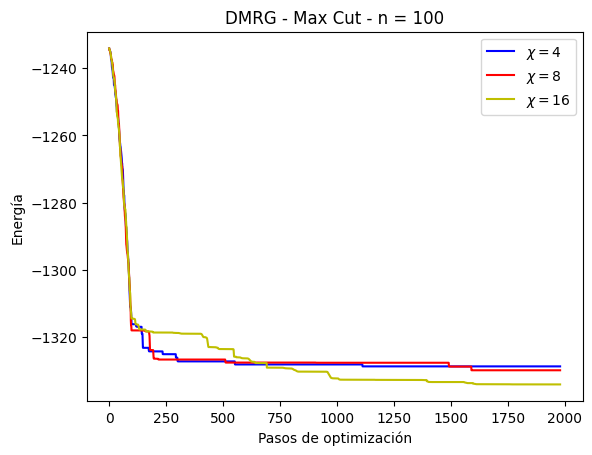

In [97]:
plt.plot(range(len(energy_4)), energy_4, "b", label=r"$\chi = 4$")
plt.plot(range(len(energy_8)), energy_8, "r", label=r"$\chi = 8$")
plt.plot(range(len(energy_16)), energy_16, "y", label=r"$\chi = 16$")

plt.legend()
plt.title("DMRG - Max Cut - n = 100")
plt.xlabel("Pasos de optimización")
plt.ylabel("Energía")
plt.show()